# 1 K-means Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io 
import scipy.misc 

In [2]:
data = 'ex7data2.mat'
mat = scipy.io.loadmat(data)

X= mat['X']

In [3]:
#
def plot(X, show=False):
        
    
    
    
           
    if show==True:
        plt.scatter(X[:,0], X[:,1], label='data', color='red')
        plt.legend() 
        plt.show()
    else:
        plt.scatter(X[:,0], X[:,1])

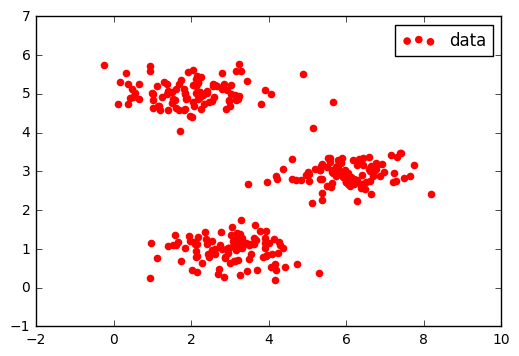

In [4]:
plot(X, show=True)

"The K-means
algorithm will always converge to some final set of means for the centroids.
Note that the converged solution may not always be ideal and depends on the
initial setting of the centroids. Therefore, in practice the K-means algorithm
is usually run a few times with different random initializations." - pdf

# 1.1.1 Finding closest centroids

In [5]:
def closest_centroids(X,centroids_matrix):
    
    #plan: 1) how many training examples to each centroids?
    m=len(X)
    #im assuming K will be in the namespace when this gets called by K_means
    
    matrix=np.zeros((m,len(centroids_matrix)), dtype=float)
    #this is an m x whatever matrix that i will populate with the norms, then i will use this object to assign it to centroids
    
    for i in range(len(centroids_matrix)):    
        centroid=centroids_matrix[i]
        #centroids should come in as row-wise in a matrix.
        
        for j in range(m):
            x=X[j]
            norm_squared=np.dot((x-centroid).T, x-centroid)
            #might as well use norm squared as it will give me same points as just the norm
            
            #print(matrix[j:i])
            #print(norm_squared)
            matrix[j,i]=norm_squared
            #obs notice j,i as opposed to i,j
            
    #now matrix rows are elements on the norms for every centroid        
            
    #for every row, check which element is the lowest. the column index that locates it is the cluster that it will get assigned to.
    
    c=[]
    #this will be the index that collects which centroid it is closest to c[i]=j , means training ex i is closest to cluster j. 
    for row in matrix:
        min_centroids=np.argmin(row)
        c.append(min_centroids)
        
    
    return c      

In [6]:
centroids=np.array([[1,1],[1,1]], dtype=float)

In [7]:
initial_centroids = np.array([[3,3],[6,2],[8,5]])

"you should see the output [1 3 2]
corresponding to the centroid assignments for the first 3 examples." -pdf in our version it outsputs -1 on each elements due to starting counting at zero.

In [8]:
closest_centroids(X, initial_centroids)[0:3]

[0, 2, 1]

### 1.1.2 Computing centroid means

In [225]:
def compute_centroids(X, centroids_matrix,K):
    
    c=closest_centroids(X, centroids_matrix)
    #print("how many times")
    #plan of attack: 
    
    #K is assumed to exist in the namespace by virtue of being called by K_means(X,K), so the range of c is 0..K-1 (inc)
    #NOTE UPDATE: the thing about the namespace is false in Python.
    #for every value 0..K-1, find the elements that belongs to it,
    # then compute the avg of these
    
    updated_centroids_matrix=np.zeros(centroids_matrix.shape)
    
    member_sum=0 #
    members=0
    for i in range(K):
        
        for j in range(len(c)):
            
            if c[j]==i:
                x=X[j]
                member_sum+=x
                members+=1
                
        if members==0:
            avg_vector=np.zeros(X[0].shape)
        else:
            avg_vector=member_sum/members
            
        member_sum=0
        members=0
        #reset above after checking i in 0..K-1
        
        updated_centroids_matrix[i]=avg_vector
        
    return updated_centroids_matrix    

In [238]:
def K_means(X, K):
    
    #initalize clusters
    X_row_len=X.shape[1]
    
    centroids_matrix=(X.max()-X.min() ) * np.random.random_sample((K, X_row_len))-X.min()
    
    
    
    #until convergence:
    # i'll be lazy and assume converge after n=10 iterations, to follow the pdf.
    for i in range(10):
        
        #print(centroids_matrix)
        #c=closest_centroids(X, centroids_matrix)
        
        centroids_matrix=compute_centroids(X, centroids_matrix,K=K)
        
    return centroids_matrix    
    

In [140]:
centroids_matrix=K_means(X,K=3)

In [141]:
centroids_matrix

array([[ 1.95399466,  5.02557006],
       [ 6.03366736,  3.00052511],
       [ 3.04367119,  1.01541041]])

In [142]:
plot(X)

In [143]:
#centroids_matrix=(X.max()-X.min() ) * np.random.random_sample((3, 2))-X.min()

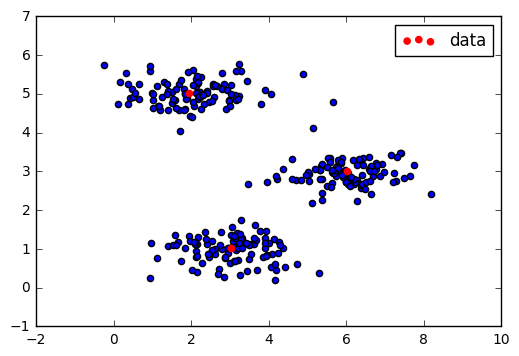

In [144]:
plot(centroids_matrix,show=True)

Rerunning the above 4-5 lines of codes shows that there exists multiple local minimums.

In [148]:
c_final=closest_centroids(X,centroids_matrix)

In [149]:
import pandas as pd

In [152]:
X_df=pd.DataFrame(X)

In [153]:
X_df['c']=c_final

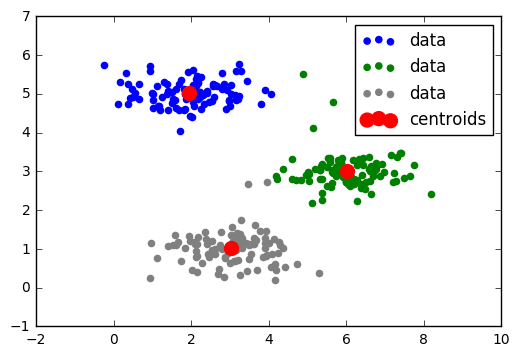

In [171]:
plt.scatter(X_df[X_df.c==0][[0]], X_df[X_df.c==0][[1]], label='data', color='blue')
plt.scatter(X_df[X_df.c==1][[0]], X_df[X_df.c==1][[1]], label='data', color='green')
plt.scatter(X_df[X_df.c==2][[0]], X_df[X_df.c==2][[1]], label='data', color='grey')

plt.scatter(centroids_matrix[:,0], centroids_matrix[:,1], label='centroids', color='red', s=100)

plt.legend() 
plt.show()

Looks like it works!

### 1.3 Random initialization

In [178]:
#since my previous code has random init. i'm skipping this.

### 1.4 Image compression with K-means

In [180]:
data='bird_small.mat'
import scipy.io 
import scipy.misc   
mat = scipy.io.loadmat(data)


In [187]:
X=mat['A']
mat['A'].shape

(128, 128, 3)

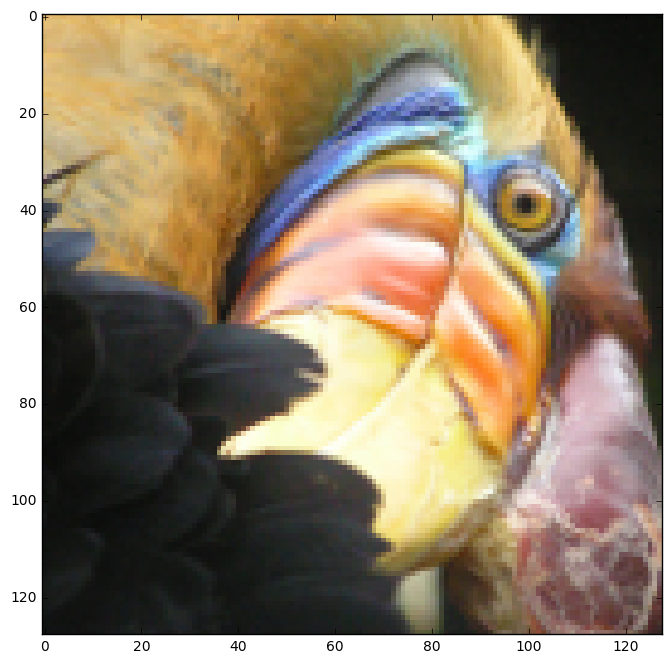

In [236]:
fig = plt.figure(figsize=(8,8))
img_matrix=scipy.misc.toimage(X)
plt.imshow(X,cmap=plt.cm.Greys_r, interpolation='none')
plt.show()

In [190]:
X[:,:,0].shape # so this should be the matrix rep red-intensity

(128, 128)

need to find a good representation of the tensor. so that it fits the algorithms that ive build
it should be one matrix, 


In [193]:
X_reshape=X.reshape((128*128,3))

In [196]:
print(X[0,0,0],X[0,0,1], X[0,0,2])

219 180 103


In [206]:
X_reshape[0]


array([ 219.,  180.,  103.])

Above is just a small test to see that the reshape is as expected. This is when order is default to C.

In [205]:
X_reshape=X_reshape.astype(np.float)

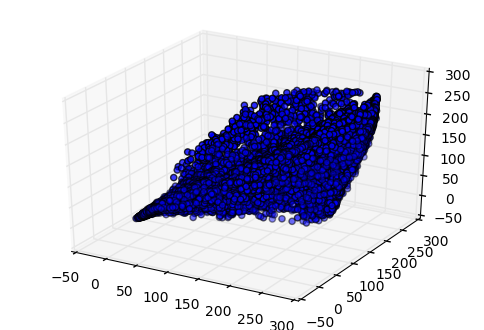

In [214]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_reshape[:,0],X_reshape[:,1],X_reshape[:,2], )
plt.show()

Interesting datacloud. This is likely a right hand side oriented plot, showing the dimensions of red,green,blue. Now i need to assign values to the actual datapoints according to the cluster that they are assigned to!

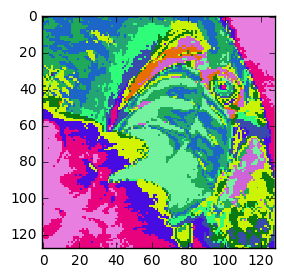

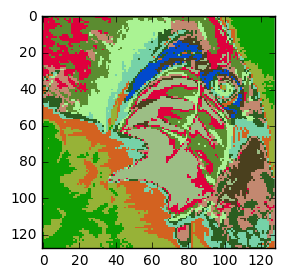

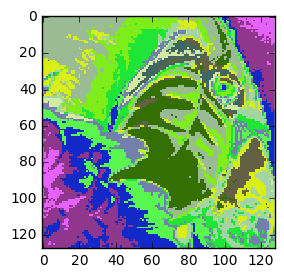

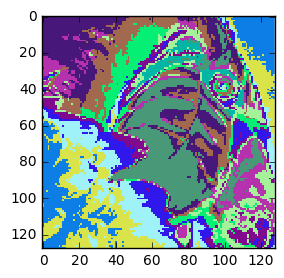

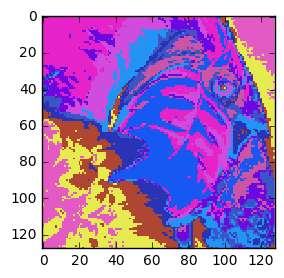

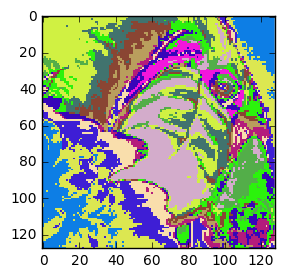

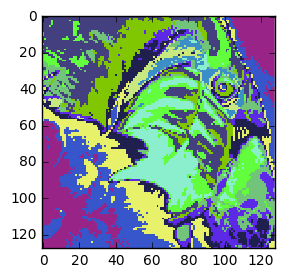

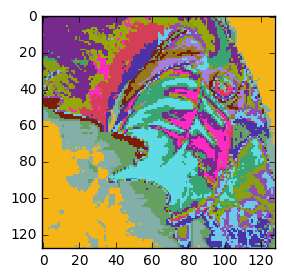

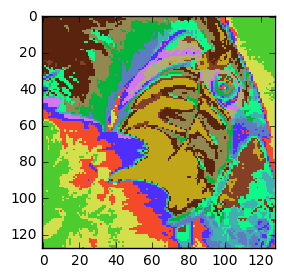

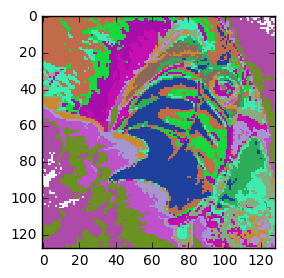

In [292]:
for i in range(10):
    centroids_matrix=K_means(X_reshape,K=16)
    c_final=closest_centroids(X_reshape,centroids_matrix)

    matrix=np.zeros(X_reshape.shape)

    for i in range(len(c_final)):
    
        cluster_index=c_final[i]
    
        matrix[i]=centroids_matrix[cluster_index]
    
    matrix=matrix.reshape(128,128,3) 

    fig = plt.figure(figsize=(3,3))
    img_matrix=scipy.misc.toimage(matrix)
    plt.imshow(matrix,cmap=plt.cm.Greys_r, interpolation='none')
    plt.show()

Very cool images! but not exactly what i wanted. So under the assumption that the algorithm converges (which is not certain) there seems to exist a lot of local minimums (the pictures seem to be distinct).

### Principal Component Analysis

In [293]:
data = 'ex7data1.mat'
mat = scipy.io.loadmat(data)

X= mat['X']

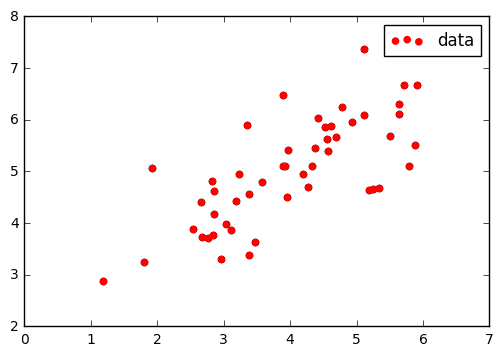

In [295]:
plot(X, show=True)

irst, you compute the covariance matrix of the data.
10
Then, you use Octave/MATLABâ€™s SVD function to compute the eigenvec- tors U1, U2, . . . , Un. These will correspond to the principal components of variation in the data.
Before using PCA, it is important to first normalize the data by subtract- ing the mean value of each feature from the dataset, and scaling each dimen- sion so that they are in the same range.

In [303]:
def feature_norm(X):
    
    X_c=X.copy()
    
    column_len=len(X_c[0])
    
    for i in range(column_len):
        
        X_c[:,i]=(X_c[:,i]- X_c[:,i].mean())/X_c[:,i].std()
        
    return X_c    

In [304]:
X_feat=feature_norm(X)

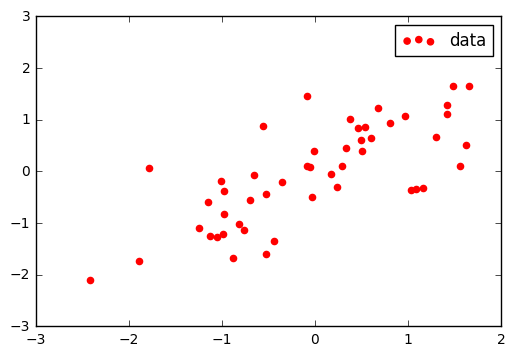

In [306]:
plot(X_feat,show=True)

In [310]:
cov_matrix=np.dot(X_feat.T,X_feat)/len(X_feat)

In [311]:
U,S,V=np.linalg.svd(cov_matrix)

In [313]:
#since cov_matrix is symmetric, svd will work as eigenvector decomposition.
#so Us kolumns are the eigenvectors and S should then have the eigen values?

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [335]:
means=[X_feat[:,0].mean(),X_feat[:,1].mean()]

#i dissplace the vectors from the means
plt.plot([means[0], means[0] + U[0,0]], 
         [means[1], means[1] + U[0,1]],
        color='blue',linewidth=3,
        label='First Principal Component')
plt.plot([means[0], means[0] + U[1,0]], 
         [means[1], means[1] + U[1,1]],
        color='fuchsia',linewidth=3,
        label='Second Principal Component')

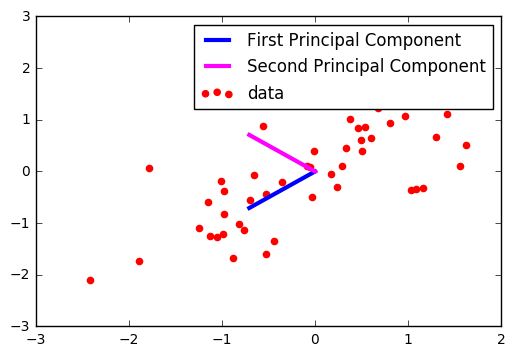

In [336]:
plot(X_feat,show=True)

In [338]:
U #hmmm i wonder why the PC are not orthogonal to each other on the graph when they clearly are algebraiclly

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [352]:
a[:4]

array([0, 1, 2, 3])

'You should expect to see an output of about [-0.707 -0.707].'-pdf

### 2.3 Dimensionality Reduction with PCA

array([ 1.49631261, -0.92218067,  1.22439232,  1.64386173,  1.2732206 ,
       -0.97681976,  1.26881187, -2.34148278, -0.02999141, -0.78171789,
       -0.6316777 , -0.55280135, -0.0896816 , -0.5258541 ,  1.56415455,
       -1.91610366, -0.88679735,  0.95607375, -2.32995679, -0.47793862,
       -2.21747195,  0.38900633, -1.78482346,  0.05175486,  1.66512392,
        0.50813572, -1.23711018, -1.17198677,  0.84221686, -0.00693174,
       -0.22794195, -1.51309518,  1.33874082, -0.5925244 ,  0.67907605,
       -1.35298   ,  1.68749495, -1.39235931,  2.55992598, -0.27850702,
       -0.97677692,  0.88820006,  1.29666127, -0.98966774,  1.81272352,
       -0.27196356,  3.19297722,  1.21299151,  0.36792871, -1.44264131])

In [358]:
def project_data(X_feat,U,K):
    
    U_red=U[:,:K]
    
    return np.dot(X_feat, U_red)
    

In [364]:
project_data(X_feat,U,1)[0]

array([ 1.49631261])

project the first example onto the first dimension and you should see a value of about 1.481

### 2.3.2 Reconstructing an approximation of the data

Since U is orthonormal its inverse is its transpose. However I do not think that it applies to U[:,:1], since it is a 2 dim vector. 

In [367]:
np.dot(np.array([ 1.49631261]),U[:,:1].T)

array([-1.05805279, -1.05805279])

In [373]:
def recover_data(Y_feat,U,K):
    
    U_red_inverse=U[:,:K].T
    
    return np.dot(Y_feat, U_red_inverse)

In [371]:
Y_feat=project_data(X_feat,U,2)

In [378]:
recover_data(Y_feat,U,2)-X_feat #i,e the errors are very small for all elements, hence showing that it works.

array([[  3.33066907e-16,   2.22044605e-16],
       [ -2.77555756e-16,   0.00000000e+00],
       [  4.44089210e-16,   1.11022302e-16],
       [  6.66133815e-16,   2.22044605e-16],
       [  5.55111512e-16,   1.11022302e-16],
       [ -2.77555756e-17,   0.00000000e+00],
       [  3.33066907e-16,   0.00000000e+00],
       [ -8.88178420e-16,   0.00000000e+00],
       [  1.38777878e-17,   0.00000000e+00],
       [ -2.22044605e-16,   0.00000000e+00],
       [ -2.22044605e-16,   0.00000000e+00],
       [ -2.22044605e-16,  -5.55111512e-17],
       [ -5.55111512e-17,  -2.77555756e-17],
       [ -4.44089210e-16,   0.00000000e+00],
       [  6.66133815e-16,   0.00000000e+00],
       [ -8.88178420e-16,   0.00000000e+00],
       [ -3.33066907e-16,  -1.11022302e-16],
       [  5.55111512e-16,   1.11022302e-16],
       [ -6.66133815e-16,   0.00000000e+00],
       [ -4.44089210e-16,  -5.55111512e-17],
       [ -8.88178420e-16,  -2.22044605e-16],
       [  1.66533454e-16,   2.77555756e-17],
       [ -

### 2.4 Face Image Dataset

In [379]:
data = 'ex7faces.mat'
mat = scipy.io.loadmat(data)

X= mat['X']

recall dispay_data that i construced in ex3. am just making appropriate changes to it.

In [416]:
def display_data(X,sample_rows=100):
    #sample rows has to be square
    
    width=32
    height=32

    row_dim=int(np.sqrt(sample_rows)*height)
    col_dim=row_dim

    matrix=np.zeros((row_dim,col_dim)).astype(float)

    #random_index=random.sample(range(0,len(X)), sample_rows)
    random_index=range(sample_rows)

    row_i=0
    col_i=0
    for i in random_index:
        

        random_row=X[i][:]
        X_row_matrix=np.reshape(random_row,(width,height)).T

        matrix[ height*row_i : height*(row_i+1) , width*col_i : width*(col_i+1)]=X_row_matrix
        #the submatrix shape will be 20 by 20. and from a given row, it will go columnwise
        #(as opposed to the converse, namely that for a given column, go row-wise)
        #there probably exists a name for this but i dont know it. drawing pictures help.
        #for this submatrix (that is populated by zeros), assign it the X_row_matrix

        col_i+=1
        #for the given row_i, increment col_i

        if col_i==matrix.shape[1]/height:
            #i,e we have looped through col_i until the end of the col_dim
          
            row_i+=1
            col_i=0
            #then we want to reset the col index and start on a new row

            #we do not need the same kind of reset-mechanism on row_i since random_index, by construction, has just the correct length

    return matrix

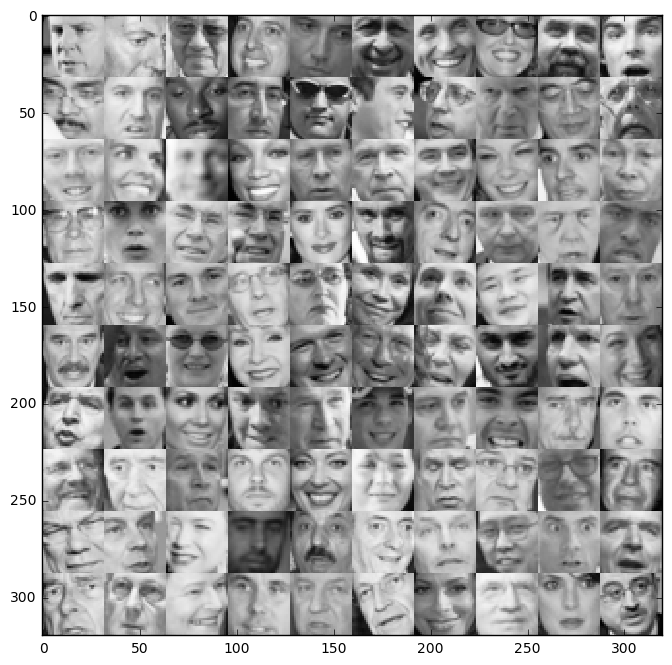

In [394]:
tst_matrix=display_data(X)
fig = plt.figure(figsize=(8,8))
img_matrix=scipy.misc.toimage(tst_matrix)
plt.imshow(img_matrix,cmap=plt.cm.Greys_r, interpolation='none')
plt.show()

### 2.4.1 PCA on Faces

In [430]:
X_feat=feature_norm(X)

In [397]:
cov_matrix=np.dot(X_feat.T,X_feat)/len(X_feat)

In [398]:
U,S,V=np.linalg.svd(cov_matrix)

In [399]:
U.shape

(1024, 1024)

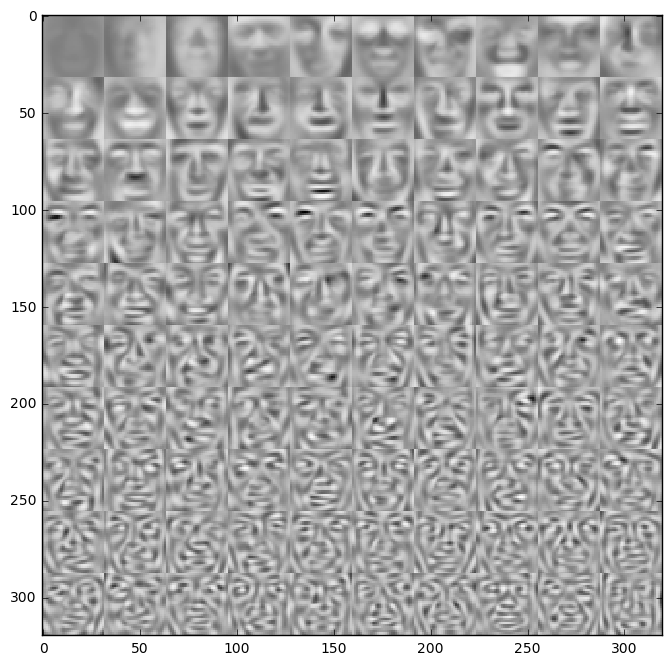

In [417]:
tst_matrix=display_data(U.T)
fig = plt.figure(figsize=(8,8))
img_matrix=scipy.misc.toimage(tst_matrix)
plt.imshow(img_matrix,cmap=plt.cm.Greys_r, interpolation='none')
plt.show()

In [431]:
Y_feat_projected=project_data(X_feat,U,100)

In [432]:
X_feat_recovered=recover_data(Y_feat_projected,U,100)

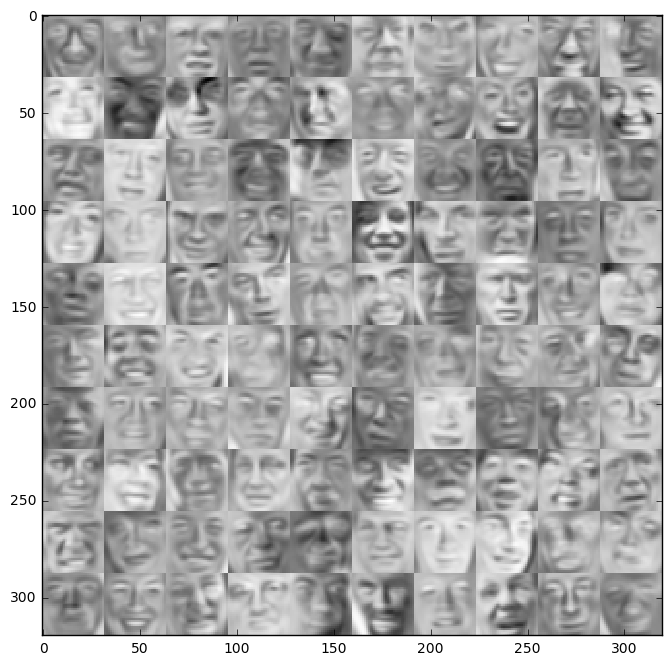

In [433]:
tst_matrix=display_data(X_feat_recovered)
fig = plt.figure(figsize=(8,8))
img_matrix=scipy.misc.toimage(tst_matrix)
plt.imshow(img_matrix,cmap=plt.cm.Greys_r, interpolation='none')
plt.show()

TODO: optional exercise and take a second look at the face projections.
